# 데이터 읽기와 쓰기

### read_csv
- https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv

In [1]:
import pandas as pd

path = 'https://github.com/pandas-dev/pandas/raw/main/doc/data/'
filename = 'titanic.csv'

titanic = pd.read_csv(path+filename)

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### write to / read from excel
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel

In [4]:
titanic.to_excel("titanic.xlsx", sheet_name="passengers", index=False)

In [5]:
titanic2 = pd.read_excel("titanic.xlsx", sheet_name="passengers")

### simple plot (matplotlib is used by default)
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [6]:
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv'
air_quality = pd.read_csv(url, index_col=0, parse_dates=True)
# air_quality.plot()

In [7]:
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


<AxesSubplot:xlabel='datetime'>

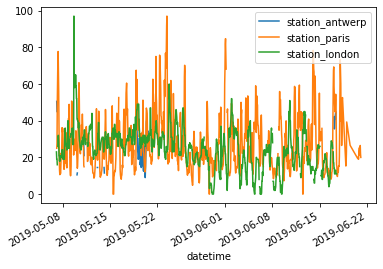

In [8]:
air_quality.plot()

### data manipulation

* The calculation is again element-wise, so the / is applied for the values in each row.

* Also other mathematical operators (+, -, *, /,…) or logical operators (<, >, ==,…) work element-wise. The latter was already used in the subset data tutorial to filter rows of a table using a conditional expression.

In [9]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [10]:
air_quality.paris_mg_per_cubic = air_quality.station_paris * 1.882
air_quality.head()

/var/folders/yr/jd3hph_53llgn3rcd194plzc0000gp/T/ipykernel_23771/655808859.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  air_quality.paris_mg_per_cubic = air_quality.station_paris * 1.882


,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [11]:
air_quality["ratio_paris_antwerp"] = (air_quality["station_paris"] 
                                      / air_quality["station_antwerp"])

air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


### combine two tables

In [12]:
url_no2 = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv"
air_quality_no2 = pd.read_csv(url_no2, parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location",
                                   "parameter", "value"]]
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [13]:
url_pm25 = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_pm25_long.csv"
air_quality_pm25 = pd.read_csv(url_pm25, parse_dates=True)
air_quality_pm25 = air_quality_pm25[["date.utc", "location",
                                   "parameter", "value"]]
air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


### concatenating objects

![](https://pandas.pydata.org/docs/_images/08_concat_row.svg)

* I want to combine the measurements of NO2 and PM25, two tables with a similar structure, in a single table.

In [14]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)
air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [15]:
print("Shape of the ``air_quality_pm25`` table: ", air_quality_pm25.shape)
print("Shape of the ``air_quality_no2`` table: ", air_quality_no2.shape)
print("Shape of the resulting ``air_quality`` table: ", air_quality.shape)

Shape of the ``air_quality_pm25`` table:  (1110, 4)
Shape of the ``air_quality_no2`` table:  (2068, 4)
Shape of the resulting ``air_quality`` table:  (3178, 4)


* sort by values

In [16]:
air_quality = air_quality.sort_values("date.utc")
air_quality.head()

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


### join tables using a common identifier
![](https://pandas.pydata.org/docs/_images/08_merge_left.svg)

In [17]:
air_quality_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date.utc   1110 non-null   object 
 1   location   1110 non-null   object 
 2   parameter  1110 non-null   object 
 3   value      1110 non-null   float64
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [18]:
air_quality_no2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date.utc   2068 non-null   object 
 1   location   2068 non-null   object 
 2   parameter  2068 non-null   object 
 3   value      2068 non-null   float64
dtypes: float64(1), object(3)
memory usage: 64.8+ KB


In [19]:
air_quality = pd.merge(air_quality_pm25, air_quality_no2, on="date.utc")
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2315 entries, 0 to 2314
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date.utc     2315 non-null   object 
 1   location_x   2315 non-null   object 
 2   parameter_x  2315 non-null   object 
 3   value_x      2315 non-null   float64
 4   location_y   2315 non-null   object 
 5   parameter_y  2315 non-null   object 
 6   value_y      2315 non-null   float64
dtypes: float64(2), object(5)
memory usage: 144.7+ KB


In [20]:
air_quality.head()

,date.utc,location_x,parameter_x,value_x,location_y,parameter_y,value_y
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,FR04014,no2,51.4
1,2019-06-18 06:00:00+00:00,London Westminster,pm25,7.0,FR04014,no2,51.4
2,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,FR04014,no2,51.6
3,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,BETR801,no2,41.0
4,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,London Westminster,no2,13.0
